In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/ML_Bootcamp

/content/drive/MyDrive/ML_Bootcamp


In [ ]:
!ls

catvsdog_tensorflow.ipynb  dogs-vs-cats.zip


In [ ]:
#Importing and extracting the .zip file

import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/ML_Bootcamp/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/ML_Bootcamp')
zip_ref.close()

In [ ]:
#Importing all the neccessory libraries

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
#Distributing images into batches for the train and test sets

train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/ML_Bootcamp/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test_data = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/ML_Bootcamp/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize for ease of computation

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_data = train_data.map(process)
test_data = test_data.map(process)

In [ ]:
#Model architecture
model = Sequential()

#Convolution
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

#Neural Network
model.add(Dense(128,activation='relu')) #hidden layer 1
model.add(Dense(64,activation='relu')) #hidden layer 2
model.add(Dense(1,activation='sigmoid')) #output layer

In [ ]:
#Building the model based on my architecture

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#To get summary of model parameters

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
#Feeding data to the model

model.fit(train_data, epochs =10, validation_data= test_data)

Epoch 1/10
625/625 [==============================] - 104s 132ms/step - loss: 0.6263 - accuracy: 0.6367 - val_loss: 0.5421 - val_accuracy: 0.7256
Epoch 2/10
625/625 [==============================] - 104s 166ms/step - loss: 0.4824 - accuracy: 0.7668 - val_loss: 0.4690 - val_accuracy: 0.7766
Epoch 3/10
625/625 [==============================] - 84s 133ms/step - loss: 0.3755 - accuracy: 0.8284 - val_loss: 0.4952 - val_accuracy: 0.7910
Epoch 4/10
625/625 [==============================] - 84s 133ms/step - loss: 0.2425 - accuracy: 0.8963 - val_loss: 0.5863 - val_accuracy: 0.7948
Epoch 5/10
625/625 [==============================] - 90s 142ms/step - loss: 0.1450 - accuracy: 0.9430 - val_loss: 0.8249 - val_accuracy: 0.7796
Epoch 6/10
625/625 [==============================] - 93s 147ms/step - loss: 0.0877 - accuracy: 0.9690 - val_loss: 0.8636 - val_accuracy: 0.7882
Epoch 7/10
625/625 [==============================] - 83s 132ms/step - loss: 0.0549 - accuracy: 0.9800 - val_loss: 1.0630 - val_

In [ ]:
model.evaluate(test_data)

157/157 [==============================] - 14s 86ms/step - loss: 1.2343 - accuracy: 0.7874


[1.2342779636383057, 0.7874000072479248]

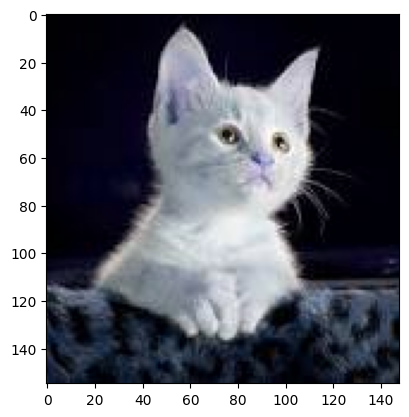

In [ ]:
#To read the image

import cv2

test_img = cv2.imread("/content/cat.jpg")
plt.imshow(test_img)

In [ ]:
#Resizing the image

test_img = cv2.resize(test_img,(256,256))

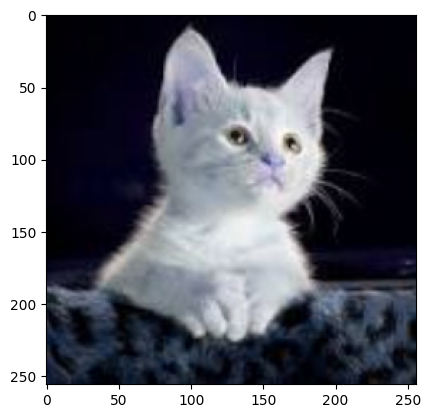

In [ ]:
plt.imshow(test_img)

In [ ]:
#Reshaping the image

test_input = test_img.reshape((1,256,256,3)) #(no. of inputs,h,w,channel)

In [ ]:
#loading the model
from keras.models import load_model
mymodel = load_model('/content/drive/MyDrive/ML_Bootcamp/mymodel1.h5')

##For the prediction

In [ ]:
mymodel.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)

In [ ]:
var = (mymodel.predict(test_input) > 0.5).astype("int32")

1/1 [==============================] - 0s 20ms/step


In [ ]:
if var[0][0]==0:
  print('Cat')
else :
  print('Dog')

Cat


##For Deployment

In [ ]:
#Deployment

model.save('mymodel1.h5')